In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
##Lets load the dataset 
df = pd.read_csv('clean')

In [7]:
##Look at dataframe structure 
df.shape

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [8]:
##First five rows 
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [9]:
##Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [18]:
##Description of dataset
df.describe()

,gender,age,debt,married,bankcustomer,yearsemployed,priordefault,employed,creditscore,driverslicense,zipcode,income,approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.511594,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.864891,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.000000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,38.000000,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.000000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [17]:
##Lowercase column names 
df.columns = df.columns.str.lower()

In [12]:
##Lets round the age for more accurate readings 
df['age'] = (df['age']).round()
df['age'] = df['age'].astype(int)
df['age']

0      31
1      59
2      24
3      28
4      20
       ..
685    21
686    23
687    25
688    18
689    35
Name: Age, Length: 690, dtype: int64

In [19]:
##Encode values for industry
industrymap = {'Industrials': 0, 
               'Materials':1, 
               'CommunicationServices':2, 
               'Transport':3,
               'InformationTechnology':4, 
               'Financials':5, 
               'Energy':6, 
               'Real Estate':7,
               'Utilities':8, 
               'ConsumerDiscretionary':9, 
               'Education':10,
               'ConsumerStaples':11, 
               'Healthcare':12, 
               'Research':13}

df['industry'] = df['industry'].map(industrymap)


In [20]:
##Encode values for ethnicity
ethnicitymap = {'White':0, 
                'Black':1, 
                'Asian':2, 
                'Latino':3, 
                'Other':4}

df['ethnicity'] = df['ethnicity'].map(ethnicitymap)

In [21]:
##Encode values for citizenship
citizenmap = {'ByBirth':0, 
                'ByOtherMeans':1, 
                'Temporary':2}

df['citizen'] = df['citizen'].map(citizenmap)

<Axes: >

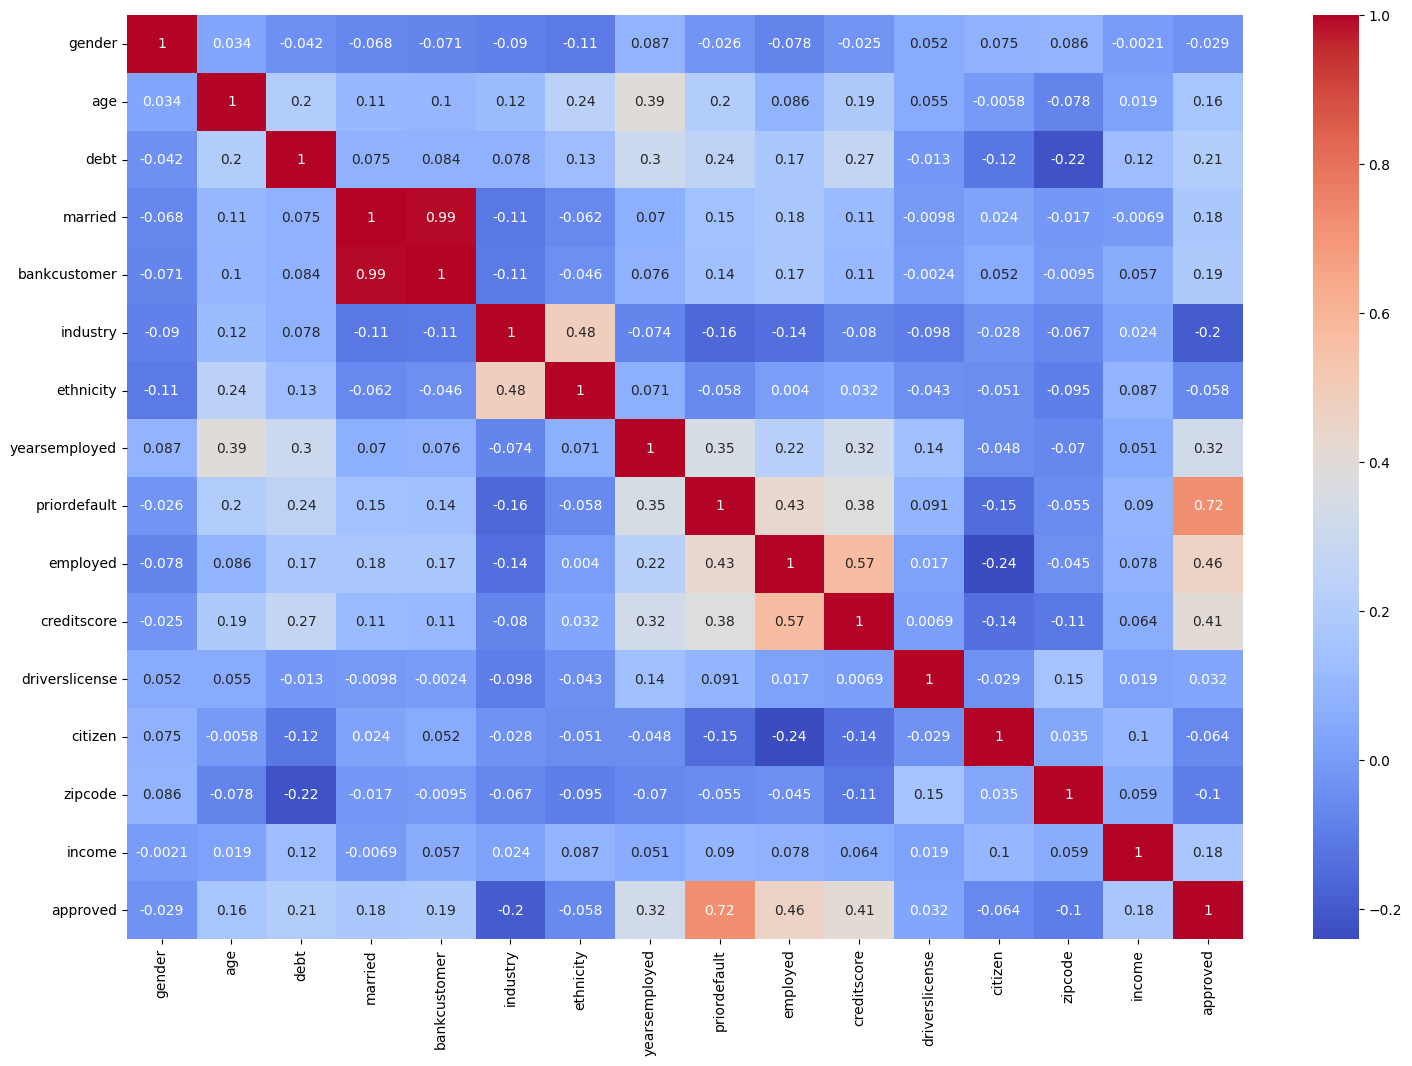

In [25]:
##Heatmap 
df_corr = df.corr()
plt.figure(figsize = (18,12))
sns.heatmap(df_corr, annot= True, cmap = 'coolwarm')

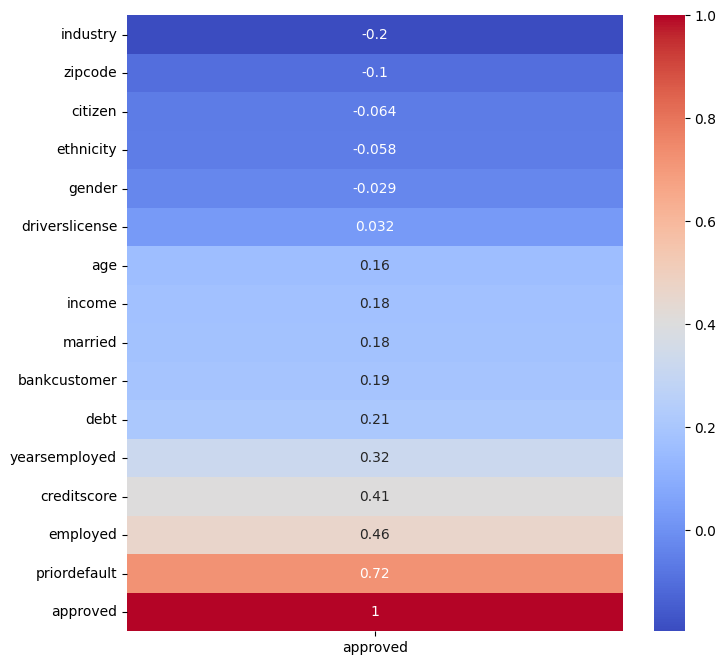

In [27]:
##Plot a vertical heatmap for clearer look against 'approved'
plt.figure(figsize = (8,8))
sns.heatmap(df_corr[['approved']].sort_values(by = ['approved']),
            cmap = 'coolwarm',
            annot = True);

In [28]:
##Let's find the ratio of approved and rejected applications 
df['approved'].value_counts()

approved
0    383
1    307
Name: count, dtype: int64

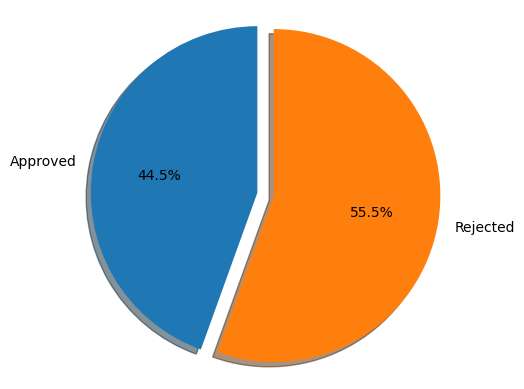

In [32]:
##Now pie chart the ratios 
labels = 'Approved', 'Rejected'
fraction= [307, 383]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(fraction, explode = explode, labels = labels, autopct = '%1.1f%%', 
       shadow = True, startangle = 90)
ax1.axis('scaled')

plt.show()

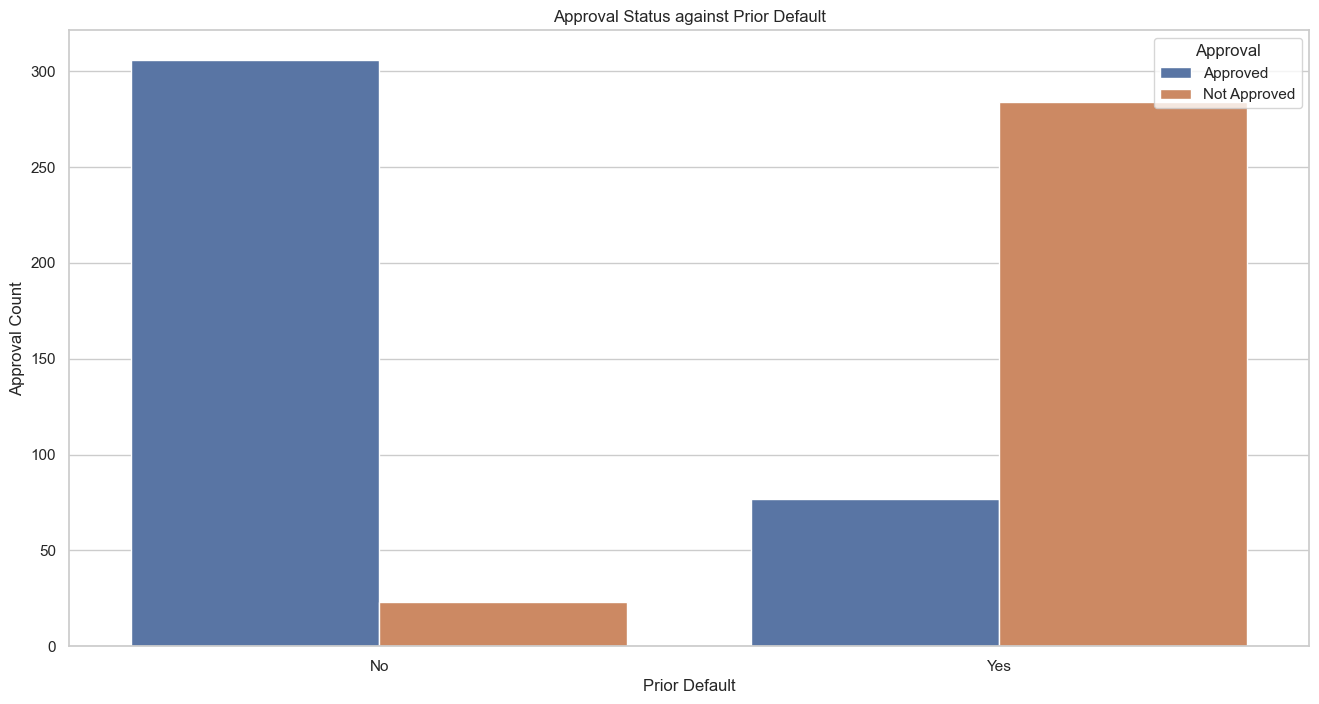

In [60]:
sns.set_theme(style = "whitegrid")

bars = ["No", "Yes"]
x = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (16,8))
priordefault_plot = sns.countplot(data=df, x="priordefault", hue="approved")
priordefault_plot.set(xlabel = "Prior Default", ylabel = "Approval Count")
ax.set_xticks(x , bars)
plt.legend(title="Approval", labels=["Approved", "Not Approved"], loc="upper right")
plt.title("Approval Status against Prior Default")
plt.show()

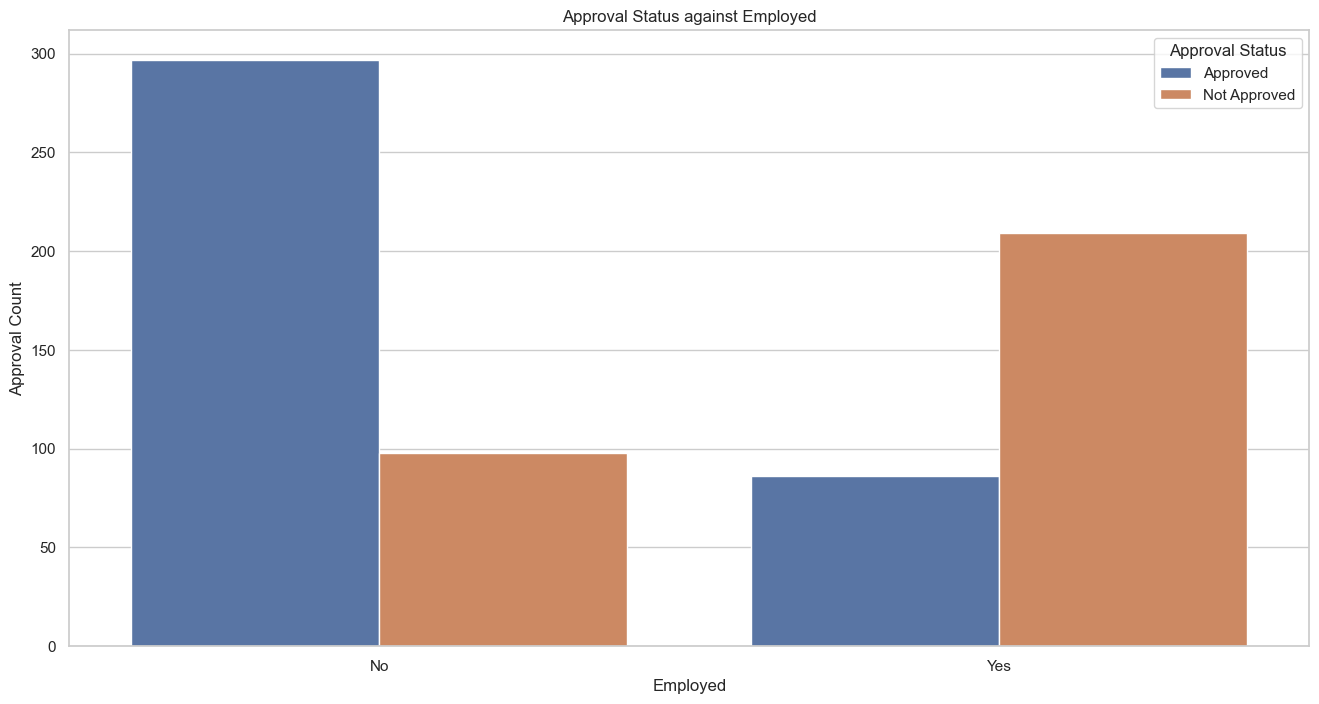

In [62]:
sns.set_theme(style = "whitegrid")

bars = ["No", "Yes"]
x = np.arange(len(bars))

fig, ax = plt.subplots(figsize = (16,8))
priordefault_plot = sns.countplot(data=df, x="employed", hue="approved")
priordefault_plot.set(xlabel = "Employed", ylabel = "Approval Count")
plt.legend(title="Approval Status", labels=["Approved", "Not Approved"], loc="upper right")
ax.set_xticks(x, bars)
plt.title("Approval Status against Employed")
plt.show()

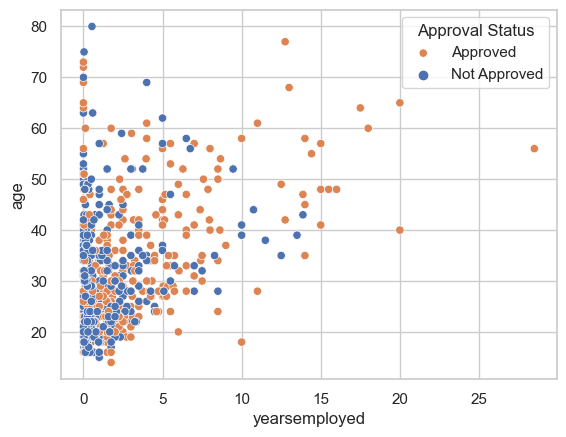

In [67]:
sns.scatterplot(x = "yearsemployed", y = "age", data = df, hue = "approved")
plt.legend(title="Approval Status", labels=["Approved", "Not Approved"], loc="upper right")
plt.show()